# Lab - 4

Name: Purusharth Malik

Registration No.: 2348542

### a) Use a recorded short speech signal/download the same from any speech dataset.

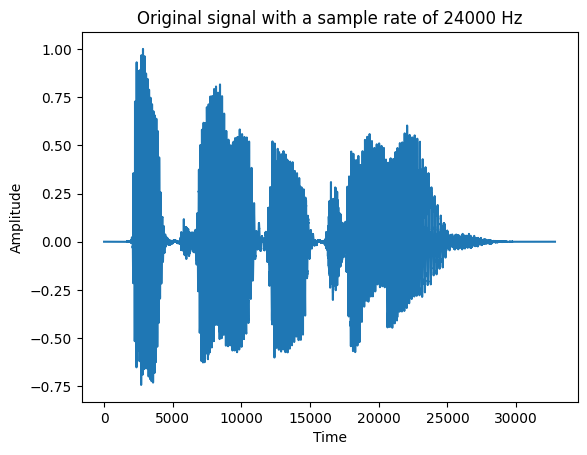

In [55]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

sample_rate, speech = wavfile.read(r"C:\Users\purus\Downloads\tts_output_2.wav")
speech = speech / np.max(speech)
plt.plot(speech)
plt.title(f"Original signal with a sample rate of {sample_rate} Hz")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

The speech in the above signal is **Okay, that's enough**.

### b) Implement the LPC algorithm to analyze the recorded speech signal and extract LPC coefficients.

We will follow the following approach,
- Calculate the autocorrelation
- Use the autocorrelation to create the Toeplitz matrix
- Solve the matrix for the LPC coefficients

In [59]:
import numpy as np
from scipy.linalg import toeplitz

def lpc(signal, order):
    # Autocorrelation
    autocorr = np.correlate(signal, signal, 
                            mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    
    # Creating the Toeplitz matrix
    R = toeplitz(autocorr[:order])
    r = autocorr[1:order + 1]
    
    # Solving for LPC coefs
    lpc_coef = np.linalg.solve(R, r)
    
    return np.concatenate([[1], -lpc_coef])

lpc_coef = lpc(speech, 24)
lpc_coef

array([ 1.        , -1.23437698,  0.39142068, -1.05406396,  1.46920811,
       -0.79030653,  0.87485074, -1.39309475,  1.15156552, -0.89864587,
        1.15199626, -1.15640097,  0.92521916, -0.94875708,  1.13872065,
       -0.94842295,  0.75340807, -0.93229446,  0.73323912, -0.43533597,
        0.56968847, -0.46728685,  0.19907055, -0.2763213 ,  0.20705446])

These coefficients capture the predictive relationship between the samples in the speech signal.

### c) Reconstruct the speech signal from the LPC coefficients and plot the original and reconstructed signals. 

We will use inverse filtering to reconstruct the signal.

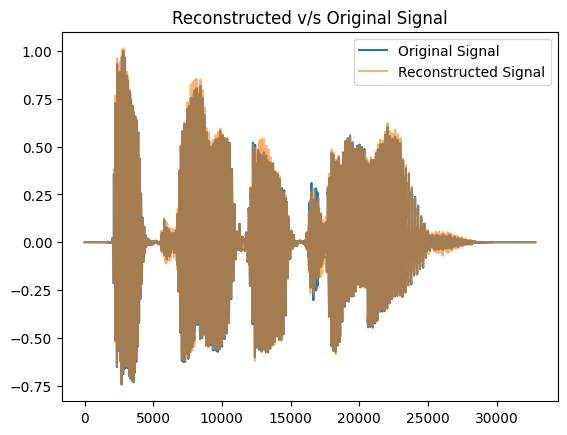

In [65]:
from scipy.signal import lfilter

reconstructed = lfilter([0] + -lpc_coef[1:], [1], speech)

plt.plot(speech, label='Original Signal')
plt.plot(reconstructed, alpha=0.6, label='Reconstructed Signal')
plt.title("Reconstructed v/s Original Signal")
plt.legend()
plt.show()

### d) Estimate the formants from the LPC coefficients and compare them to the expected values for vowels (e.g., for vowels like /a/, /e/, /i/, etc.).

### e) Plot the formant frequencies and visualize them on a frequency response plot.

In [68]:
# Finding the roots of the LPC polynomial
roots = np.roots(lpc_coef)

# Filtering out the roots outside the unit circle
roots = [r for r in roots if np.abs(r) < 1]

# Calculating the angles of the roots
angles = np.angle(roots)

# Converting angles to frequncies
formants = sorted(angles * (sample_rate / (2 * np.pi)))

# Keeping only speech formants
formants = [f for f in formants if f > 100 and f < 4800]
formants

[231.53565393821063,
 957.8340850861464,
 1963.131867014958,
 2798.559227254418,
 4025.7504735388766]

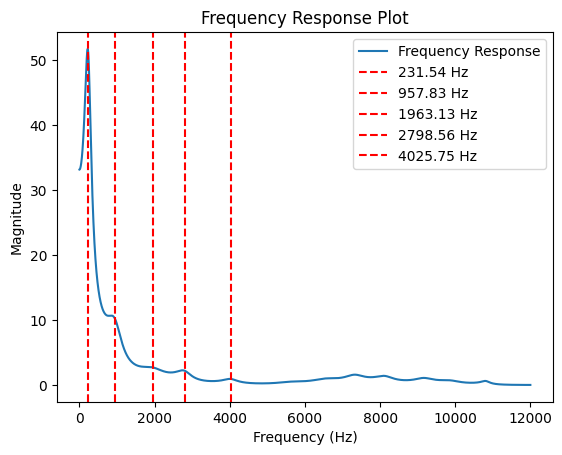

Formants: [231.53565393821063, 957.8340850861464, 1963.131867014958, 2798.559227254418, 4025.7504735388766]


In [74]:
from scipy.signal import freqz

w, h = freqz(1, lpc_coef, worN=8000)
freqs = w * sample_rate / (2 * np.pi)

plt.plot(freqs, np.abs(h), label='Frequency Response')
plt.title("Frequency Response Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

for formant in formants:
    plt.axvline(formant, color='red', linestyle='--', label=f'{formant:.2f} Hz')
plt.legend(loc='best')
plt.show()
print(f"Formants: {formants}")

Let us look at what the format frequencies represent in terms of vowels,
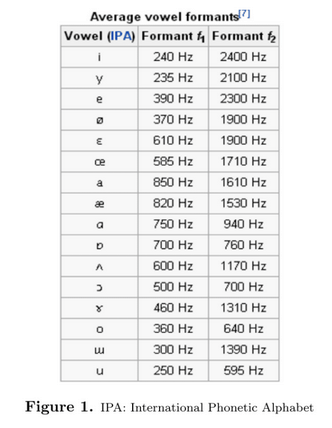

Therefore, we have,
```
231 Hz - /y/, /i/, /u/
957 Hz - /a/
1963 Hz - either /e/ or /o/
```

The initial sentence was **Okay, that's enough**, so the vowels, /a/, /e/, /o/, and /u/ are present.

 # End